# PROJET SISE 2020-2021 BIG DATA MINING

## Classification dans un contexte déséquilibré - une application à la fraude bancaire

##### Equipe projet : Mathias Da Costa Meira, Fabrice Petitfrere

***

## 1. ANALYSE PRELIMINAIRE

### Chargement des données

In [1]:
import pandas as pd
#df = pd.read_csv('C:/Users/f.petitfrere.FRGINGER/Documents/SISE/08 - Fouille de données massives/Projet/dataproject.txt', sep=";", decimal=',', encoding='UTF-8')
df = pd.read_csv('E:/M2 - SISE/Detection fraude cheque/dataproject.txt', sep=';',decimal=',',encoding='UTF-8')
df.head(10)

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
0,A034010041908012010710730,71051532,40.17,2016-03-21 07:47:38,0,1,1,1,535,0.000000,...,21.834061,0,1,4.0,4.0,4.0,40.17,0.0,28058,0
1,A035010041908006493331734,71051533,20.00,2016-03-21 08:04:57,0,0,0,0,358,0.000000,...,12.586532,0,1,4.0,4.0,4.0,20.00,0.0,29097,0
2,A013010003908005150136747,71051534,35.00,2016-03-21 08:06:45,0,0,0,0,199,0.000000,...,39.274924,0,1,4.0,4.0,4.0,35.00,0.0,29205,0
3,A013010041908025639221029,71051536,20.00,2016-03-21 08:11:38,0,0,0,0,38,0.000000,...,39.274924,0,1,4.0,4.0,4.0,20.00,0.0,29498,0
4,A013010003908005556100283,71051538,20.00,2016-03-21 08:17:11,0,0,0,0,26,0.000000,...,39.274924,0,1,4.0,4.0,4.0,20.00,0.0,29831,0
5,A007010278908891620264901,71051539,35.09,2016-03-21 08:17:26,0,0,0,0,459,0.000000,...,35.523979,0,1,4.0,4.0,4.0,35.09,0.0,29846,0
6,A056010003908116850002378,71051541,60.00,2016-03-21 08:19:56,0,0,0,0,500,0.000000,...,12.586532,0,1,4.0,4.0,4.0,60.00,0.0,29996,0
7,A034013506908085106167163,71051542,120.00,2016-03-21 08:20:42,0,1,1,1,389,0.308483,...,21.834061,0,1,4.0,4.0,4.0,120.00,0.0,30042,0
8,A056015589908090385895930,71051544,59.25,2016-03-21 08:21:04,0,1,1,1,538,0.000000,...,12.586532,0,1,4.0,4.0,4.0,59.25,0.0,30064,0
9,A056015589908093500453310,71051548,17.00,2016-03-21 08:22:56,0,0,0,0,13,0.000000,...,12.586532,0,1,4.0,4.0,4.0,17.00,0.0,30176,0


### Inspection initiale

In [2]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ZIBZIN
False    2231369
Name: ZIBZIN, dtype: int64

IDAvisAutorisAtionCheque
False    2231369
Name: IDAvisAutorisAtionCheque, dtype: int64

MontAnt
False    2231369
Name: MontAnt, dtype: int64

DAteTrAnsAction
False    2231369
Name: DAteTrAnsAction, dtype: int64

CodeDecision
False    2231369
Name: CodeDecision, dtype: int64

VerifiAnceCPT1
False    2231369
Name: VerifiAnceCPT1, dtype: int64

VerifiAnceCPT2
False    2231369
Name: VerifiAnceCPT2, dtype: int64

VerifiAnceCPT3
False    2231369
Name: VerifiAnceCPT3, dtype: int64

D2CB
False    2231369
Name: D2CB, dtype: int64

ScoringFP1
False    2231369
Name: ScoringFP1, dtype: int64

ScoringFP2
False    2231369
Name: ScoringFP2, dtype: int64

ScoringFP3
False    2231369
Name: ScoringFP3, dtype: int64

TAuxImpNb_RB
False    2231369
Name: TAuxImpNb_RB, dtype: int64

TAuxImpNB_CPM
False    2231369
Name: TAuxImpNB_CPM, dtype: int64

EcArtNumCheq
False    2231369
Name: EcArtNumCheq, dtype: int64

NbrMAgAsin3J
False    2231369
Name: NbrMAgAsin

Aucune valeur manquante !

In [3]:
# Types de données
df.dtypes

ZIBZIN                       object
IDAvisAutorisAtionCheque      int64
MontAnt                     float64
DAteTrAnsAction              object
CodeDecision                  int64
VerifiAnceCPT1                int64
VerifiAnceCPT2                int64
VerifiAnceCPT3                int64
D2CB                          int64
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TAuxImpNb_RB                float64
TAuxImpNB_CPM               float64
EcArtNumCheq                  int64
NbrMAgAsin3J                  int64
DiffDAteTr1                 float64
DiffDAteTr2                 float64
DiffDAteTr3                 float64
CA3TRetMtt                  float64
CA3TR                       float64
Heure                         int64
FlAgImpAye                    int64
dtype: object

### Analyse descriptive

In [4]:
# Nombre total de transactions
df.shape

(2231369, 23)

In [5]:
df.describe()

,IDAvisAutorisAtionCheque,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
count,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,...,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06
mean,7.356762e+07,5.991771e+01,1.288043e-02,3.991402e-01,4.296752e-01,4.816980e-01,2.477938e+02,3.100542e+00,6.882686e-01,1.769416e-01,...,3.256122e+01,6.724334e+03,1.034200e+00,3.947808e+00,4.234163e+00,4.266234e+00,6.683475e+01,6.917041e+00,5.347306e+04,2.804108e-03
std,1.458268e+06,7.980922e+01,1.682062e-01,5.250070e-01,6.056457e-01,7.339127e-01,2.131088e+02,3.047480e+01,9.336748e+00,5.662696e-01,...,3.475789e+01,1.742520e+05,1.862585e-01,1.078915e+00,5.510923e-01,4.643674e-01,8.929606e+01,3.550385e+01,1.200173e+04,5.287955e-02
min,7.105153e+07,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.969986e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.745370e-04,1.365741e-03,1.000000e-02,0.000000e+00,1.336000e+03,0.000000e+00
25%,7.232987e+07,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.874265e-03,-2.869431e+00,1.179973e-03,...,1.390821e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.792000e+01,0.000000e+00,4.248500e+04,0.000000e+00
50%,7.353719e+07,4.235000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.430000e+02,1.543502e-02,0.000000e+00,2.131271e-03,...,2.526529e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.732000e+01,0.000000e+00,5.488200e+04,0.000000e+00
75%,7.480167e+07,7.205000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.680000e+02,1.370299e-01,5.289664e+00,1.533859e-02,...,3.927492e+01,0.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,8.130000e+01,0.000000e+00,6.390700e+04,0.000000e+00
max,7.619241e+07,1.698534e+04,3.000000e+00,1.500000e+01,4.000000e+01,4.000000e+01,5.510000e+02,1.680000e+04,4.702998e+01,1.839140e+01,...,7.142857e+02,9.993474e+06,1.000000e+01,5.000000e+00,5.000000e+00,5.000000e+00,1.698534e+04,1.060000e+04,8.256400e+04,1.000000e+00


In [6]:
# Résumé statistiques des 11 premières variables
df.iloc[:,:12].describe(include='all')

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3
count,2231369,2.231369e+06,2.231369e+06,2231369,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06
unique,1037097,NaN,NaN,1925254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A075008315908204592226253,NaN,NaN,2016-04-19 00:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,170,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.356762e+07,5.991771e+01,NaN,1.288043e-02,3.991402e-01,4.296752e-01,4.816980e-01,2.477938e+02,3.100542e+00,6.882686e-01,1.769416e-01
std,NaN,1.458268e+06,7.980922e+01,NaN,1.682062e-01,5.250070e-01,6.056457e-01,7.339127e-01,2.131088e+02,3.047480e+01,9.336748e+00,5.662696e-01
min,NaN,7.105153e+07,1.000000e-02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.969986e+01,0.000000e+00
25%,NaN,7.232987e+07,2.500000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.874265e-03,-2.869431e+00,1.179973e-03
50%,NaN,7.353719e+07,4.235000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.430000e+02,1.543502e-02,0.000000e+00,2.131271e-03
75%,NaN,7.480167e+07,7.205000e+01,NaN,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.680000e+02,1.370299e-01,5.289664e+00,1.533859e-02


In [7]:
# Résumé statistiques des 12 dernières variables
df.iloc[:,12:].describe(include='all')

,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
count,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06
mean,3.286594e+01,3.256122e+01,6.724334e+03,1.034200e+00,3.947808e+00,4.234163e+00,4.266234e+00,6.683475e+01,6.917041e+00,5.347306e+04,2.804108e-03
std,9.774278e+01,3.475789e+01,1.742520e+05,1.862585e-01,1.078915e+00,5.510923e-01,4.643674e-01,8.929606e+01,3.550385e+01,1.200173e+04,5.287955e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.745370e-04,1.365741e-03,1.000000e-02,0.000000e+00,1.336000e+03,0.000000e+00
25%,0.000000e+00,1.390821e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.792000e+01,0.000000e+00,4.248500e+04,0.000000e+00
50%,1.547988e+01,2.526529e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.732000e+01,0.000000e+00,5.488200e+04,0.000000e+00
75%,3.460208e+01,3.927492e+01,0.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,8.130000e+01,0.000000e+00,6.390700e+04,0.000000e+00
max,1.000000e+04,7.142857e+02,9.993474e+06,1.000000e+01,5.000000e+00,5.000000e+00,5.000000e+00,1.698534e+04,1.060000e+04,8.256400e+04,1.000000e+00


#### Analyse des transactions acceptées / refusées

In [8]:
# Séparation des transactions acceptées / refusées
refus = df[df['FlAgImpAye'] == 1]
accept = df[df['FlAgImpAye'] == 0]

# Subset des 10000 premières transactions
accept10000 = accept.head(1000)



# Répartion des transactions
a = accept.shape[0]
r = refus.shape[0]

print("Nombre de transactions acceptées : {}".format(a))
print("Nombre de transactions refusées  : {}".format(r))

# Taux de transactions refusées dans la population totale
tx = refus.shape[0] / df.shape[0] *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx))

Nombre de transactions acceptées : 2225112
Nombre de transactions refusées  : 6257
Taux de transactions refusées sur le total : 0.28 %


In [9]:
# Résumé des transactions refusées des 11 premières variables
refus.iloc[:,:13].describe(include='all')

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB
count,6257,6.257000e+03,6257.000000,6257,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000
unique,4069,NaN,NaN,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A013010041908020729891229,NaN,NaN,2016-06-03 12:53:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.372501e+07,94.557721,NaN,0.049385,0.582228,0.762506,1.043791,120.252357,13.129692,-6.484655,0.548859,42.546430
std,NaN,1.461851e+06,133.659270,NaN,0.326215,0.736553,1.035116,1.660143,174.550080,60.269539,10.487739,1.496775,104.884440
min,NaN,7.105166e+07,3.170000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-43.111829,0.000000,0.000000
25%,NaN,7.249057e+07,31.160000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.011909,-13.557330,0.002155,0.000000
50%,NaN,7.379739e+07,50.630000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,0.186288,-3.432834,0.026118,18.181818
75%,NaN,7.498143e+07,103.240000,NaN,0.000000,1.000000,1.000000,2.000000,198.000000,3.941429,0.000000,0.716043,41.878552


In [10]:
# Résumé des transactions refusées des 12 dernières variables
refus.iloc[:,12:].describe(include='all')

,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
count,6257.000000,6257.000000,6.257000e+03,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.0
mean,42.546430,40.543897,4.913774e+03,1.113952,3.462059,4.132642,4.308389,125.447465,30.889744,55993.042832,1.0
std,104.884440,46.146348,1.356109e+05,0.427206,1.662598,1.004134,0.696478,183.762486,103.232060,11768.679965,0.0
min,0.000000,0.000000,0.000000e+00,1.000000,0.000324,0.003507,0.016412,4.000000,0.000000,1402.000000,1.0
25%,0.000000,21.834061,0.000000e+00,1.000000,2.167292,4.000000,4.000000,38.340000,0.000000,45944.000000,1.0
50%,18.181818,26.478376,0.000000e+00,1.000000,4.000000,4.000000,4.000000,69.880000,0.000000,57660.000000,1.0
75%,41.878552,41.356493,1.000000e+00,1.000000,5.000000,5.000000,5.000000,143.130000,23.110000,65860.000000,1.0
max,1250.000000,714.285714,7.423270e+06,7.000000,5.000000,5.000000,5.000000,5156.190000,3775.720000,79798.000000,1.0


### Corrélations

Faison une sélection de variables sur lesquelles examiner les corrélations

In [11]:
pd.DataFrame(df.columns)

,0
0,ZIBZIN
1,IDAvisAutorisAtionCheque
2,MontAnt
3,DAteTrAnsAction
4,CodeDecision
5,VerifiAnceCPT1
6,VerifiAnceCPT2
7,VerifiAnceCPT3
8,D2CB
9,ScoringFP1


In [12]:
varcorr = [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
dfcorr = df.iloc[:,varcorr]

In [13]:
dfcorr.corr()

,MontAnt,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure
MontAnt,1.000000,0.449371,0.421585,0.389742,-0.066918,0.407152,0.079138,0.133244,-0.004756,-0.028364,-0.004967,-0.030014,0.073920,0.070107,0.069027,0.917877,0.060658,0.013562
VerifiAnceCPT1,0.449371,1.000000,0.939030,0.868696,-0.067262,0.068670,0.128181,0.046132,-0.006053,-0.040806,-0.004542,-0.010928,0.062271,0.063832,0.060534,0.417222,0.039216,0.003742
VerifiAnceCPT2,0.421585,0.939030,1.000000,0.934981,-0.061832,0.064161,0.106889,0.041338,-0.005410,-0.036128,0.002945,0.013190,0.015726,0.038687,0.046465,0.417042,0.101225,0.001619
VerifiAnceCPT3,0.389742,0.868696,0.934981,1.000000,-0.053551,0.053178,0.091850,0.027721,-0.005314,-0.034163,0.006493,0.020101,-0.001600,0.018390,0.027146,0.395700,0.119128,0.000076
D2CB,-0.066918,-0.067262,-0.061832,-0.053551,1.000000,-0.117004,-0.148568,-0.357932,0.006847,0.049810,0.019564,0.069176,-0.349217,-0.588348,-0.682462,-0.048663,0.028033,-0.006254
ScoringFP1,0.407152,0.068670,0.064161,0.053178,-0.117004,1.000000,-0.008655,0.367638,-0.001596,-0.005168,-0.003334,-0.014808,0.081406,0.134805,0.156178,0.369111,0.013116,0.000183
ScoringFP2,0.079138,0.128181,0.106889,0.091850,-0.148568,-0.008655,1.000000,-0.027542,-0.008154,-0.061697,-0.002616,-0.029744,0.082637,0.092490,0.094741,0.060221,-0.026433,-0.094061
ScoringFP3,0.133244,0.046132,0.041338,0.027721,-0.357932,0.367638,-0.027542,1.000000,0.001811,0.002308,-0.010204,-0.043327,0.251666,0.411004,0.473758,0.109517,-0.024072,0.023424
TAuxImpNb_RB,-0.004756,-0.006053,-0.005410,-0.005314,0.006847,-0.001596,-0.008154,0.001811,1.000000,0.106220,-0.000498,0.001068,-0.006776,-0.012700,-0.014402,-0.004659,-0.001027,0.008144
TAuxImpNB_CPM,-0.028364,-0.040806,-0.036128,-0.034163,0.049810,-0.005168,-0.061697,0.002308,0.106220,1.000000,-0.001987,-0.007761,-0.027373,-0.061982,-0.074023,-0.028716,-0.008466,0.032082


In [14]:
# librairies
import matplotlib as mpl
import matplotlib.pyplot as plt
#print(plt.style.available)
#mpl.style.use(['seaborn-dark-palette'])
mpl.style.use(['Solarize_Light2'])

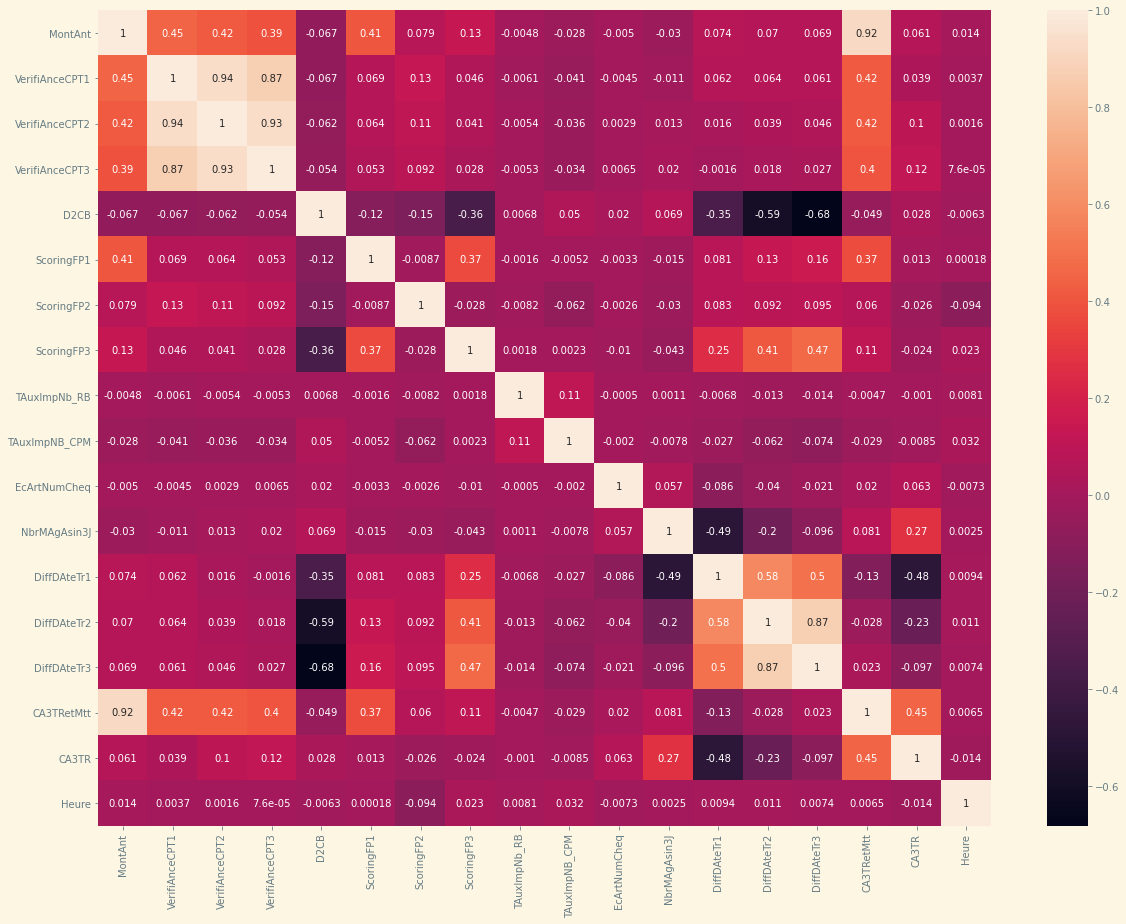

In [15]:
import seaborn as sns
correlation_mat = dfcorr.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation_mat, annot = True)
plt.show()

Ca ne nous dit pas grand chose en fait ! A part peut être une faible corrélation inverse entre scoring FP3 (score d'anormalité) et D2CB (durée de connaissance du client) qui peut sembler logique.

### Comparaison de moyennes sur variables caractéristiques

Pour comprendre un peu mieux ce qui différencie les transactions acceptées de celles refusées, on peut effectuer les comparaisons suivantes :
- montant
- heure de la transaction
- durée de connaissance du client
- nombre de transactions effectuées par le même identifiant (le même jour, 3 derniers jours, 7 derniers jours)
- score d'anormalité (FP1, FP2, FP3)
- écart aux transactions précédentes (n-1, n-2, n-3)  
  
On peut regarder la moyenne (pour savoir s'il y a une différence signicative entre les deux) mais aussi la distribution suivant les variables.

#### Montant

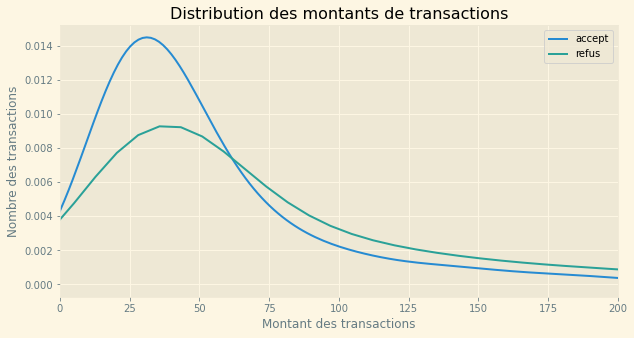

In [16]:
# Subplot 1
accept10000["MontAnt"].plot(kind='kde', # basé sur les 10000 premières transactions seulement (trop lent sinon !)
                   xlim=(0,200),
             stacked=False,
             figsize=(10, 5),
             )
# Subplot 2:
refus["MontAnt"].plot(kind='kde',
                   xlim=(0,200),
             stacked=False,
             figsize=(10, 5),
             )
plt.xlabel("Montant des transactions")
plt.ylabel("Nombre des transactions")
plt.title("Distribution des montants de transactions")
plt.legend(['accept','refus'])

plt.show()

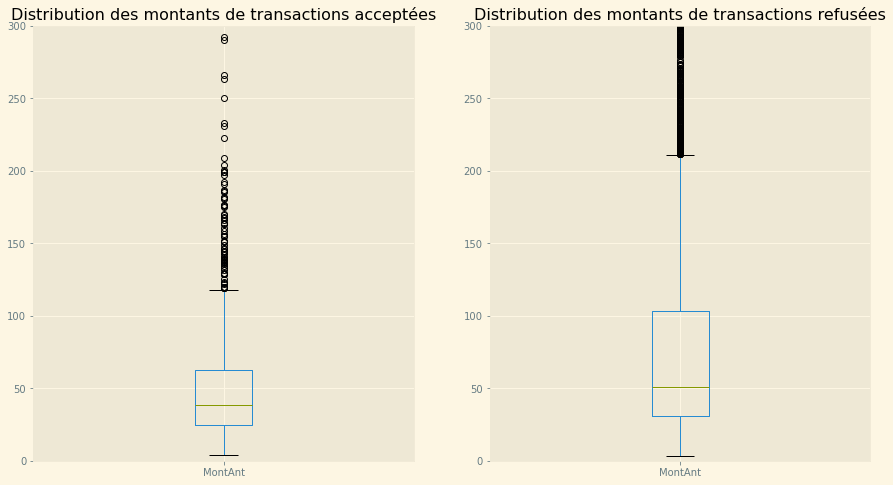

In [17]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


accept10000["MontAnt"].plot(kind='box',
                   ylim=(0,300),
             stacked=False,
             figsize=(15, 8),
             ax=ax0
             )
ax0.set_title("Distribution des montants de transactions acceptées")

refus["MontAnt"].plot(kind='box',
                   ylim=(0,300),
             stacked=False,
             figsize=(15, 8),
             ax=ax1
             )
ax1.set_title("Distribution des montants de transactions refusées")

plt.show()

Il faut tester si la différence de moyenne est significative !

In [18]:
# Calcul de la différence des moyennes
m_refus = refus["MontAnt"].mean()
m_accept = accept["MontAnt"].mean()

d = m_refus - m_accept
print("m_refus =",m_refus)
print("m_accept =",m_accept)
print("d =",d)

# Variances
std_refus = refus["MontAnt"].std()
std_accept = accept["MontAnt"].std()
print("std refus = {}".format(std_refus))
print("std accept = {}".format(std_accept))

# calcul de l'intervalle d'estimation à 5%
from scipy import stats
import numpy as np
u = stats.norm.ppf(0.975)
e = u*np.sqrt(std_refus**2/r+std_accept**2/a)
interval = [d-e,d+e]
print("u = {}".format(u))
print("e = {}".format(e))
print(interval)


m_refus = 94.55772095253336
m_accept = 59.82030618237889
d = 34.737414770154466
std refus = 133.65926983611553
std accept = 79.58524228720847
u = 1.959963984540054
e = 3.3134504375977487
[31.423964332556718, 38.05086520775222]


La différence de montant moyen de transaction entre acceptées et refusées est significative à 5% et comprise entre 31 et 38 €.

In [19]:
# Calcul de la différence des moyennes pour la variable heure
m_refus_h = refus["Heure"].mean()
m_accept_h = accept["Heure"].mean()

d = m_refus - m_accept
print("m_refus_h =",m_refus_h)
print("m_accept_h =",m_accept_h)
print("d =",d)

# Variances
std_refus_h = refus["Heure"].std()
std_accept_h = accept["Heure"].std()
print("std refus_h = {}".format(std_refus_h))
print("std accept_h = {}".format(std_accept_h))

# calcul de l'intervalle d'estimation à 5%
u = stats.norm.ppf(0.975)
e = u*np.sqrt(std_refus_h**2/r+std_accept_h**2/a)
interval = [d-e,d+e]
print("u = {}".format(u))
print("e = {}".format(e))
print(interval)


m_refus_h = 55993.04283202813
m_accept_h = 53465.96967478491
d = 34.737414770154466
std refus_h = 11768.679965398002
std accept_h = 12001.639276022957
u = 1.959963984540054
e = 292.0295973714059
[-257.2921826012514, 326.7670121415604]


### Binarisation des variables catégorielles

Seule une variable catégorielle est présente dans le jeu de données "CodeDecision". Nous allons créer des variables à partir de ses modalités.

In [2]:
# Binarisation de la variable CodeDecision
CodeDecision_bin = pd.get_dummies(df.CodeDecision)
CodeDecision_bin.rename(columns={0:"CodeDecision_0", 2:"CodeDecision_2", 3:"CodeDecision_3"}, inplace=True)
CodeDecision_bin.head()

,CodeDecision_0,CodeDecision_2,CodeDecision_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [3]:
# Remplacer la variables CodeDecision par la binarisation de ses modalités
df_bin = df.drop(['CodeDecision'], axis=1)
df_bin = pd.concat([df_bin,CodeDecision_bin], axis=1, join='inner')
df_bin.head()

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,...,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye,CodeDecision_0,CodeDecision_2,CodeDecision_3
0,A034010041908012010710730,71051532,40.17,2016-03-21 07:47:38,1,1,1,535,0.0,0.0,...,4.0,4.0,4.0,40.17,0.0,28058,0,1,0,0
1,A035010041908006493331734,71051533,20.00,2016-03-21 08:04:57,0,0,0,358,0.0,0.0,...,4.0,4.0,4.0,20.00,0.0,29097,0,1,0,0
2,A013010003908005150136747,71051534,35.00,2016-03-21 08:06:45,0,0,0,199,0.0,0.0,...,4.0,4.0,4.0,35.00,0.0,29205,0,1,0,0
3,A013010041908025639221029,71051536,20.00,2016-03-21 08:11:38,0,0,0,38,0.0,0.0,...,4.0,4.0,4.0,20.00,0.0,29498,0,1,0,0
4,A013010003908005556100283,71051538,20.00,2016-03-21 08:17:11,0,0,0,26,0.0,0.0,...,4.0,4.0,4.0,20.00,0.0,29831,0,1,0,0


In [4]:
df2=df

### Exploration par période pour 

In [5]:
df2['month'] = pd.DatetimeIndex(df['DAteTrAnsAction']).month

In [6]:
df2.head()

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,...,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye,month
0,A034010041908012010710730,71051532,40.17,2016-03-21 07:47:38,0,1,1,1,535,0.0,...,0,1,4.0,4.0,4.0,40.17,0.0,28058,0,3
1,A035010041908006493331734,71051533,20.00,2016-03-21 08:04:57,0,0,0,0,358,0.0,...,0,1,4.0,4.0,4.0,20.00,0.0,29097,0,3
2,A013010003908005150136747,71051534,35.00,2016-03-21 08:06:45,0,0,0,0,199,0.0,...,0,1,4.0,4.0,4.0,35.00,0.0,29205,0,3
3,A013010041908025639221029,71051536,20.00,2016-03-21 08:11:38,0,0,0,0,38,0.0,...,0,1,4.0,4.0,4.0,20.00,0.0,29498,0,3
4,A013010003908005556100283,71051538,20.00,2016-03-21 08:17:11,0,0,0,0,26,0.0,...,0,1,4.0,4.0,4.0,20.00,0.0,29831,0,3


In [25]:
df2.month.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [26]:
refus2 = df2[df2['FlAgImpAye'] == 1]
accept2 = df2[df2['FlAgImpAye'] == 0]

In [27]:
refus2.head()

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,...,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye,month
49,A075004265908008772124369,71051662,45.07,2016-03-21 08:44:19,0,1,2,3,49,0.000000,...,4,3,1.535231,2.655104,4.0,125.21,80.14,31459,1,3
245,A026010096908801944136301,71077583,50.01,2016-03-22 10:10:08,0,1,2,3,1,0.000000,...,0,1,5.000000,5.000000,5.0,50.01,0.00,36608,1,3
321,A012010003908132050370361,71077780,211.14,2016-03-22 10:14:19,0,1,1,1,125,0.048261,...,0,1,4.000000,4.000000,4.0,211.14,0.00,36859,1,3
473,A075002135908004172315358,71078249,4.34,2016-03-22 10:24:29,0,0,0,0,290,0.014966,...,0,1,4.000000,4.000000,4.0,4.34,0.00,37469,1,3
1496,A045010041908062118821033,71081166,15.30,2016-03-22 11:23:40,0,0,0,0,518,0.001867,...,0,1,4.000000,4.000000,4.0,15.30,0.00,41020,1,3


In [28]:
import matplotlib.pyplot as plt

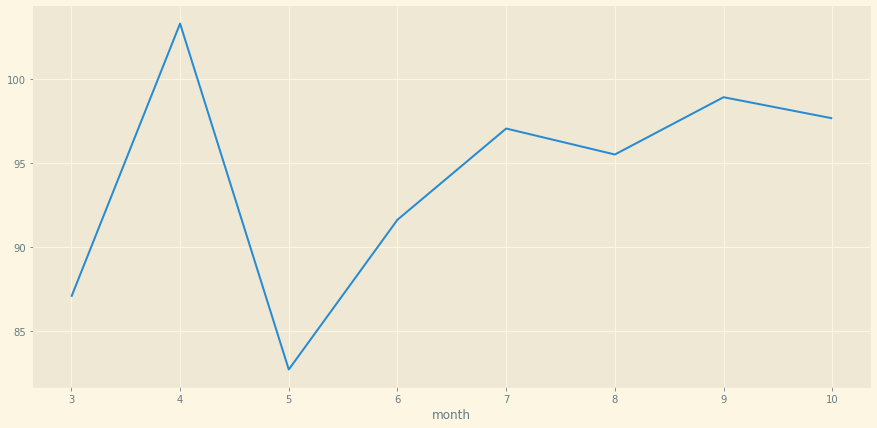

In [29]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
refus2.groupby(['month']).mean()['MontAnt'].plot(ax=ax)

In [30]:
refus2.groupby(['month']).mean()['MontAnt']

month
3      87.042244
4     103.285088
5      82.718113
6      91.621610
7      97.044672
8      95.501572
9      98.907675
10     97.651835
Name: MontAnt, dtype: float64

In [31]:
refus2.groupby(['month']).mean()['ScoringFP1']

month
3      9.504383
4     11.586635
5     11.698629
6     14.851801
7     14.485888
8     12.143726
9     17.310764
10     9.092725
Name: ScoringFP1, dtype: float64

In [32]:
refus2.groupby(['month']).mean()['ScoringFP2']

month
3    -5.919685
4    -6.582660
5    -6.824782
6    -6.242430
7    -6.349039
8    -6.399296
9    -6.700144
10   -6.561260
Name: ScoringFP2, dtype: float64

In [33]:
refus2.groupby(['month']).mean()['ScoringFP3']

month
3     0.482485
4     0.559834
5     0.546453
6     0.635355
7     0.467053
8     0.527279
9     0.626108
10    0.482078
Name: ScoringFP3, dtype: float64

In [34]:
refus2.groupby(['month']).mean()['TAuxImpNb_RB']

month
3     44.893468
4     52.017817
5     38.415989
6     41.288313
7     35.386226
8     46.021821
9     46.016721
10    36.742660
Name: TAuxImpNb_RB, dtype: float64

In [35]:
refus2.groupby(['month']).count()['FlAgImpAye']

month
3     312
4     800
5     901
6     919
7     976
8     967
9     886
10    496
Name: FlAgImpAye, dtype: int64

In [36]:
list(refus2.columns.values)

['ZIBZIN',
 'IDAvisAutorisAtionCheque',
 'MontAnt',
 'DAteTrAnsAction',
 'CodeDecision',
 'VerifiAnceCPT1',
 'VerifiAnceCPT2',
 'VerifiAnceCPT3',
 'D2CB',
 'ScoringFP1',
 'ScoringFP2',
 'ScoringFP3',
 'TAuxImpNb_RB',
 'TAuxImpNB_CPM',
 'EcArtNumCheq',
 'NbrMAgAsin3J',
 'DiffDAteTr1',
 'DiffDAteTr2',
 'DiffDAteTr3',
 'CA3TRetMtt',
 'CA3TR',
 'Heure',
 'FlAgImpAye',
 'month']

In [37]:
refus2.groupby(['month']).mean()['DiffDAteTr1']

month
3     3.384939
4     3.383810
5     3.467857
6     3.523038
7     3.507548
8     3.473924
9     3.371085
10    3.563120
Name: DiffDAteTr1, dtype: float64

In [38]:
refus2.groupby(['month']).mean()['DiffDAteTr2']

month
3     4.084289
4     4.092141
5     4.124908
6     4.170711
7     4.148143
8     4.144913
9     4.106899
10    4.163457
Name: DiffDAteTr2, dtype: float64

In [39]:
refus2.groupby(['month']).mean()['DiffDAteTr3']

month
3     4.272694
4     4.282502
5     4.281310
6     4.340134
7     4.328033
8     4.321839
9     4.309479
10    4.296143
Name: DiffDAteTr3, dtype: float64

In [40]:
refus2.groupby(['month']).mean()['CA3TRetMtt']

month
3     121.493333
4     140.086525
5     110.773141
6     117.165985
7     126.667992
8     123.209183
9     134.790237
10    131.597016
Name: CA3TRetMtt, dtype: float64

In [41]:
refus2.groupby(['month']).mean()['CA3TR']

month
3     34.451090
4     36.801437
5     28.055028
6     25.544374
7     29.623320
8     27.707611
9     35.882562
10    33.945181
Name: CA3TR, dtype: float64

In [42]:
refus2.groupby(['month']).mean()['TAuxImpNB_CPM']

month
3     47.066521
4     43.346449
5     41.778241
6     40.783613
7     38.732062
8     39.911625
9     41.128337
10    32.988248
Name: TAuxImpNB_CPM, dtype: float64

In [43]:
refus2.groupby(['month']).mean()['NbrMAgAsin3J']

month
3     1.189103
4     1.108750
5     1.084351
6     1.084875
7     1.093238
8     1.122027
9     1.168172
10    1.110887
Name: NbrMAgAsin3J, dtype: float64

In [44]:
refus2.groupby(['month']).mean()['VerifiAnceCPT1']

month
3     0.458333
4     0.611250
5     0.533851
6     0.597388
7     0.640369
8     0.578077
9     0.593679
10    0.546371
Name: VerifiAnceCPT1, dtype: float64

In [45]:
refus2.groupby(['month']).mean()['VerifiAnceCPT2']

month
3     0.631410
4     0.807500
5     0.703663
6     0.782372
7     0.856557
8     0.744571
9     0.749436
10    0.715726
Name: VerifiAnceCPT2, dtype: float64

In [46]:
refus2.groupby(['month']).mean()['VerifiAnceCPT3']

month
3     0.907051
4     1.137500
5     0.948946
6     1.047878
7     1.207992
8     1.000000
9     1.037246
10    0.917339
Name: VerifiAnceCPT3, dtype: float64

In [47]:
refus2.groupby(['month']).mean()['VerifiAnceCPT3']

month
3     0.907051
4     1.137500
5     0.948946
6     1.047878
7     1.207992
8     1.000000
9     1.037246
10    0.917339
Name: VerifiAnceCPT3, dtype: float64

In [48]:
refus2.groupby(['month']).mean()['VerifiAnceCPT3']

month
3     0.907051
4     1.137500
5     0.948946
6     1.047878
7     1.207992
8     1.000000
9     1.037246
10    0.917339
Name: VerifiAnceCPT3, dtype: float64

In [49]:
#dfm3 = df2.loc[df2['month'] ==3 ]
#dfm4 = df2.loc[df2['month'] ==4 ]
#dfm5 = df2.loc[df2['month'] ==5 ]
#dfm6 = df2.loc[df2['month'] ==6 ]
#dfm7 = df2.loc[df2['month'] ==7 ]
#dfm8 = df2.loc[df2['month'] ==8 ]
#dfm9 = df2.loc[df2['month'] ==9 ]
#dfm10 = df2.loc[df2['month'] ==10 ]

In [50]:
# Résumé statistiques des 11 premières variables
#dfm3.iloc[:,:12].describe(include='all')

In [51]:
#dfm4.iloc[:,:12].describe(include='all')

In [52]:
#dfm5.iloc[:,:12].describe(include='all')

In [53]:
#dfm6.iloc[:,:12].describe(include='all')

In [54]:
#dfm7.iloc[:,:12].describe(include='all')

In [55]:
#dfm8.iloc[:,:12].describe(include='all')

In [56]:
#dfm9.iloc[:,:12].describe(include='all')

In [57]:
#dfm10.iloc[:,:12].describe(include='all')

### Définitions des bases d'apprentissage, validation et test

In [35]:
split_date_big ='2016-09-20 00:00:01'
split_date_med ='2016-06-20 00:00:01'
split_date_small ='2016-08-15 00:00:01'
split_date_very_small ='2016-08-25 00:00:01'

In [36]:
df_big = df_bin.loc[df_bin['DAteTrAnsAction'] <= split_date_big]
df_test = df_bin.loc[df_bin['DAteTrAnsAction'] > split_date_big]
#df_small = df_bin.loc[df_bin['DAteTrAnsAction'] > split_date_small]

In [37]:
print(df_big.shape)
print(df_test.shape)

(1967226, 25)
(264143, 25)


In [38]:
df_med = df_big.loc[df_bin['DAteTrAnsAction'] > split_date_med]

In [39]:
df_med.shape

(965086, 25)

In [40]:
df_small = df_big.loc[df_bin['DAteTrAnsAction'] > split_date_small]

In [41]:
df_small.shape

(339152, 25)

In [42]:
df_very_small = df_big.loc[df_bin['DAteTrAnsAction'] > split_date_very_small]

In [43]:
df_very_small.shape

(241588, 25)

In [44]:
X_train_big = df_big
X_train_big=X_train_big.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque','DAteTrAnsAction','FlAgImpAye'], axis = 1) 

X_train_med = df_med
X_train_med = X_train_med.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque','DAteTrAnsAction','FlAgImpAye'], axis = 1)

X_train_small = df_small
X_train_small = X_train_small.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque','DAteTrAnsAction','FlAgImpAye'], axis = 1)

X_train_very_small = df_very_small
X_train_very_small = X_train_very_small.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque','DAteTrAnsAction','FlAgImpAye'], axis = 1)

X_test = df_test
X_test = X_test.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque','DAteTrAnsAction','FlAgImpAye'], axis = 1)

y_train_big = df_big['FlAgImpAye']
y_train_med = df_med['FlAgImpAye']
y_train_small = df_small['FlAgImpAye']
y_train_very_small = df_very_small['FlAgImpAye']
y_test = df_test['FlAgImpAye']

In [10]:
# Construisons nos sets d'apprentissage de base
# X_train = X_train_med
# y_train = y_train_med

In [ ]:
# Construisons nos sets d'apprentissage de base
# X_train = X_train_small
# y_train = y_train_small

In [1]:
# Construisons nos sets d'apprentissage de base
X_train = X_train_very_small
y_train = y_train_very_small

NameError: name 'X_train_very_small' is not defined

***

## 2. PRE PROCESS

### Algorithmes d'oversampling et d'undersampling

On peut adopter ici plusieurs stratégies :
- oversampling simple aléatoire
- oversampling SMOTE 10/90 (1)
- oversamping + undersampling aléatoires
- oversampling SMOTE 5/95 + undersampling aléatoire 1:9 (2)
- oversampling SMOTE 30/70 + undersampling aléatoire 1:1 (3)
- etc. 

Stratégie (1) : oversampling SMOTE

In [49]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage
accept_train = sum(y_train==0)
refus_train = sum(y_train==1)

print("Nombre de transactions acceptées : {}".format(accept_train))
print("Nombre de transactions refusées  : {}".format(refus_train))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx = refus_train / (accept_train+refus_train) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx))

Nombre de transactions acceptées : 240813
Nombre de transactions refusées  : 775
Taux de transactions refusées sur le total : 0.32 %


Taux cohérent avec le taux sur la population globale (0,28%)

In [50]:
# Installation package imbalanced-learn
#!pip install -U imbalanced-learn

In [51]:
# transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=10/90, random_state=42)
X_train_s1, y_train_s1 = oversample.fit_resample(X_train, y_train)

In [52]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage avec over-sampling
accept_train_s1 = sum(y_train_s1==0)
refus_train_s1 = sum(y_train_s1==1)

print("Nombre de transactions acceptées : {}".format(accept_train_s1))
print("Nombre de transactions refusées  : {}".format(refus_train_s1))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx_s1 = refus_train_s1 / (accept_train_s1+refus_train_s1) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx_s1))

Nombre de transactions acceptées : 240813
Nombre de transactions refusées  : 26757
Taux de transactions refusées sur le total : 10.00 %


Nous avons un premier set d'échantillons avec de l'oversampling. Nous pourrons tester nos algorithmes avec ce premier set.

Construisons un deuxième set maintenant.

Stratégie (2) : oversampling SMOTE 5/95 + undersampling aléatoire 1:9

In [53]:
# transform the dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE(sampling_strategy=5/95, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=1/9)

steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

X_train_s2, y_train_s2 = pipeline.fit_resample(X_train, y_train)

In [54]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage avec over-sampling
accept_train_s2 = sum(y_train_s2==0)
refus_train_s2 = sum(y_train_s2==1)

print("Nombre de transactions acceptées : {}".format(accept_train_s2))
print("Nombre de transactions refusées  : {}".format(refus_train_s2))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx_s2 = refus_train_s2 / (accept_train_s2+refus_train_s2) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx_s2))

Nombre de transactions acceptées : 114066
Nombre de transactions refusées  : 12674
Taux de transactions refusées sur le total : 10.00 %


Nous avons un deuxième set d'échantillons avec oversampling et undersampling qui nous donne un ratio transactions refusées/acceptées de 10/90.

Construisons un troisième set maintenant.

Stratégie (3) : oversampling SMOTE 30/70 + undersampling aléatoire 1:1

In [55]:
# transform the dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE(sampling_strategy=30/70, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=1)

steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

X_train_s3, y_train_s3 = pipeline.fit_resample(X_train, y_train)

In [56]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage avec over-sampling
accept_train_s3 = sum(y_train_s3==0)
refus_train_s3 = sum(y_train_s3==1)

print("Nombre de transactions acceptées : {}".format(accept_train_s3))
print("Nombre de transactions refusées  : {}".format(refus_train_s3))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx_s3 = refus_train_s3 / (accept_train_s3+refus_train_s3) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx_s3))

Nombre de transactions acceptées : 103205
Nombre de transactions refusées  : 103205
Taux de transactions refusées sur le total : 50.00 %


Nous avons un troisième set d'échantillons avec oversampling et undersampling qui nous donne un ratio transactions refusées/acceptées de 50/50.

***

## 3. PROTOCOLE EXPERIMENTAL

### Arbre de décision simple

#### Sans resampling

In [57]:
import numpy as np
from time import time
from sklearn.model_selection import GridSearchCV

##### A TESTER : ajouter scoring = ‘f1’ dans le GridSearch

In [62]:
# Modélisation
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Hyperparamètres 
params = {"max_depth": [3,6,9,12, None], 
            "min_samples_leaf": np.arange(1,9,1), 
            "criterion": ["gini", "entropy"]}

# Sans resampling
ct = DecisionTreeClassifier()
cv = [(slice(None), slice(None))]
start = time()
classTree = GridSearchCV(ct, params, cv=cv, n_jobs=-1)
classTree.fit(X_train,y_train)
# Prédiction
y_pred_DTC = classTree.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred_DTC)
f1 = f1_score(y_test,y_pred_DTC)
auc = roc_auc_score(y_test,y_pred_DTC)
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print(tps)

[[262453    835]
 [   806     49]]
F1-score : 0.056
ROC AUC score : 0.527
728.481


#### Sans resampling mais avec class_weight='balanced'

In [61]:
# Modélisation
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Hyperparamètres 
params = {"max_depth": [3,6,9,12, None], 
            "min_samples_leaf": np.arange(1,9,1), 
            "criterion": ["gini", "entropy"]}

# Sans resampling
ct = DecisionTreeClassifier(class_weight='balanced')
cv = [(slice(None), slice(None))]
start = time()
classTree = GridSearchCV(ct, params, cv=cv, n_jobs=-1)
classTree.fit(X_train,y_train)
# Prédiction
y_pred_DTC = classTree.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred_DTC)
f1 = f1_score(y_test,y_pred_DTC)
auc = roc_auc_score(y_test,y_pred_DTC)
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print(tps)

[[262601    687]
 [   825     30]]
F1-score : 0.038
ROC AUC score : 0.516
777.145


#### Avec oversampling SMOTE 10/90 (1)

In [30]:
# Avec oversampling
ct_s1 = DecisionTreeClassifier()
cv = [(slice(None), slice(None))]
start = time()
classTree_s1 = GridSearchCV(ct_s1, params, cv=cv, n_jobs=-1)
classTree_s1.fit(X_train_s1,y_train_s1)
# Prédiction
y_pred_DTC_s1 = classTree_s1.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation s1
cm_s1 = confusion_matrix(y_test,y_pred_DTC_s1)
f1_s1 = f1_score(y_test,y_pred_DTC_s1)
auc_s1 = roc_auc_score(y_test,y_pred_DTC_s1)
print(cm_s1)
print("F1-score : {0:.3f}".format(f1_s1))
print("ROC AUC score : {0:.3f}".format(auc_s1))
print(tps)

NameError: name 'DecisionTreeClassifier' is not defined

#### Avec oversampling SMOTE 5/95 + undersampling aléatoire 1:9 (2)

In [46]:
# Avec oversampling + undersampling
ct_s2 = DecisionTreeClassifier()
cv = [(slice(None), slice(None))]
start = time()
classTree_s2 = GridSearchCV(ct_s2, params, cv=cv, n_jobs=-1)
classTree_s2.fit(X_train_s2,y_train_s2)
# Prédiction
y_pred_DTC_s2 = classTree_s2.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation s2
cm_s2 = confusion_matrix(y_test,y_pred_DTC_s2)
f1_s2 = f1_score(y_test,y_pred_DTC_s2)
auc_s2 = roc_auc_score(y_test,y_pred_DTC_s2)
print(cm_s2)
print("F1-score : {0:.3f}".format(f1_s2))
print("ROC AUC score : {0:.3f}".format(auc_s2))
print(tps)

[[259288   4000]
 [   744    111]]
F1-score : 0.045
ROC AUC score : 0.557
333.99


#### Avec oversampling SMOTE 30/70 + undersampling aléatoire 1:1 (3)

In [47]:
# Avec oversampling + undersampling
ct_s3 = DecisionTreeClassifier()
cv = [(slice(None), slice(None))]
start = time()
classTree_s3 = GridSearchCV(ct_s3, params, cv=cv, n_jobs=-1)
classTree_s3.fit(X_train_s3,y_train_s3)
# Prédiction
y_pred_DTC_s3 = classTree_s3.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation s2
cm_s3 = confusion_matrix(y_test,y_pred_DTC_s3)
f1_s3 = f1_score(y_test,y_pred_DTC_s3)
auc_s3 = roc_auc_score(y_test,y_pred_DTC_s3)
print(cm_s3)
print("F1-score : {0:.3f}".format(f1_s3))
print("ROC AUC score : {0:.3f}".format(auc_s3))
print(tps)

[[257509   5779]
 [   732    123]]
F1-score : 0.036
ROC AUC score : 0.561
685.66


La deuxième stratégie de resampling (Avec oversampling SMOTE 5/95 + undersampling aléatoire 1:9) semble être la plus intéressante. Nous testerons celle là dans la suite.

### Bagging

#### Sans resampling

In [ ]:
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#hyperparamètres
params_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 300, 400, 500]}


params_rf_simple = {'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'n_estimators': [200, 300, 400, 500]}

# Sans resampling
rfc = RandomForestClassifier()
# cv = [(slice(None), slice(None))]
start = time()
random_forest = GridSearchCV(rfc, params_rf_simple, cv=5, n_jobs=-1, scoring='f1')
random_forest.fit(X_train,y_train)
# Prédiction
y_pred_bagging = random_forest.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred_bagging)
f1 = f1_score(y_test,y_pred_bagging)
auc = roc_auc_score(y_test,y_pred_bagging)
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print(tps)

#### Avec oversampling SMOTE 5/95 + undersampling aléatoire 1:9 (2)

In [86]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 300, 400, 500]}

# Avec oversampling + undersampling
rf_s2 = RandomForestClassifier()
cv = [(slice(None), slice(None))]
start = time()
random_forest_s2 = GridSearchCV(rf_s2, params_rf_simple, scoring='f1', cv=cv, n_jobs=-1)
random_forest_s2.fit(X_train_s2,y_train_s2)
# Prédiction
y_pred_bagging_s2 = random_forest_s2.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation s2
cm_s2 = confusion_matrix(y_test,y_pred_bagging_s2)
f1_s2 = f1_score(y_test,y_pred_bagging_s2)
auc_s2 = roc_auc_score(y_test,y_pred_bagging_s2)
print(cm_s2)
print("F1-score : {0:.3f}".format(f1_s2))
print("ROC AUC score : {0:.3f}".format(auc_s2))
print(tps)

[[262796    492]
 [   792     63]]
F1-score : 0.089
ROC AUC score : 0.536


#### Avec oversampling SMOTE 30/70 + undersampling aléatoire 1:1 (3)

### Gradient Boosting

#### Sans resampling

In [87]:
from sklearn.ensemble import GradientBoostingClassifier


#Hyperparamètres 
params_gb_simple={'n_estimators':[16,32,64,100,200], 'learning_rate':[0.25,0.1,0.05,0.025], 
            'max_depth':[1,2,4,8], 'subsample': [0.5,0.9,1], 'max_features':[0.5,0.75]} 

params_gb_more = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

# Sans resampling
gb = GradientBoostingClassifier()
cv = [(slice(None), slice(None))]
start = time()
boosting = GridSearchCV(gb, params_gb_simple, cv=cv, n_jobs=-1)
boosting.fit(X_train,y_train)
# Prédiction
y_pred_boosting = boosting.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred_boosting)
f1 = f1_score(y_test,y_pred_boosting)
auc = roc_auc_score(y_test,y_pred_boosting)
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print(tps)

[[263267     21]
 [   841     14]]
F1-score : 0.031
ROC AUC score : 0.508


#### Avec oversampling SMOTE 5/95 + undersampling aléatoire 1:9 (2)

In [88]:
# Avec oversampling + undersampling
gb_s2 = GradientBoostingClassifier()
cv = [(slice(None), slice(None))]
start = time()
boosting_s2 = GridSearchCV(gb_s2, params_gb_simple, cv=cv, n_jobs=-1)
boosting_s2.fit(X_train_s2,y_train_s2)
# Prédiction
y_pred_boosting_s2 = boosting_s2.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation s2
cm_s2 = confusion_matrix(y_test,y_pred_boosting_s2)
f1_s2 = f1_score(y_test,y_pred_boosting_s2)
auc_s2 = roc_auc_score(y_test,y_pred_boosting_s2)
print(cm_s2)
print("F1-score : {0:.3f}".format(f1_s2))
print("ROC AUC score : {0:.3f}".format(auc_s2))
print(tps)

[[263040    248]
 [   799     56]]
F1-score : 0.097
ROC AUC score : 0.532
